Loading Data
---

In [1]:
train <- read.csv("train.csv", stringsAsFactors = F)
test <- read.csv("test_new.csv", stringsAsFactors = F)

In [2]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [3]:
library(caret)
library(lattice)
library(ggplot2)
#train_t <- createDataPartition(train$Survived, p=0.25, list=FALSE)
#new_test  <- train[train_t]
#new_train <- train[-train_t]

Loading required package: lattice
Loading required package: ggplot2


In [4]:
#train$Cabin <- NULL
#test$Cabin <- NULL
full  <- rbind(train, test)

In [5]:
str(full)

'data.frame':	1309 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [6]:
replace(full$Embarked, full$Embarked == "", NA)
replace(full$Cabin, full$Cabin == "", NA)

[1] "S" "C" "S" "S" "S" "Q" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "Q" "S"
  [19] "S" "C" "S" "S" "Q" "S" "S" "S" "C" "S" "Q" "S" "C" "C" "Q" "S" "C" "S"
  [37] "C" "S" "S" "C" "S" "S" "C" "C" "Q" "S" "Q" "Q" "C" "S" "S" "S" "C" "S"
  [55] "C" "S" "S" "C" "S" "S" "C" NA  "S" "S" "C" "C" "S" "S" "S" "S" "S" "S"
  [73] "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S"
  [91] "S" "S" "S" "S" "S" "S" "C" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
 [109] "S" "Q" "S" "C" "S" "S" "C" "S" "Q" "S" "C" "S" "S" "S" "C" "S" "S" "C"
 [127] "Q" "S" "C" "S" "C" "S" "S" "S" "S" "C" "S" "S" "S" "C" "C" "S" "S" "Q"
 [145] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "Q" "S" "S" "S" "S" "S"
 [163] "S" "S" "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "C" "S" "S" "C" "S" "S"
 [181] "S" "C" "S" "S" "S" "S" "Q" "S" "Q" "S" "S" "S" "S" "S" "C" "C" "Q" "S"
 [199] "Q" "S" "S" "S" "S" "C" "S" "S" "S" "C" "Q" "C" "S" "S" "S" "S" "Q" "C"
 [217] "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S"
 [235] "S" "S" "S" "S" "S" "S" "C" "Q" "S" "S" "C" "Q" "S" "S" "S" "S" "S" "S"
 [253] "S" "S" "S" "C" "C" "S" "C" "S" "Q" "S" "S" "S" "Q" "S" "S" "S" "S" "S"
 [271] "S" "S" "S" "C" "Q" "S" "S" "S" "Q" "S" "Q" "S" "S" "S" "S" "C" "S" "S"
 [289] "S" "Q" "S" "C" "C" "S" "S" "C" "C" "S" "S" "C" "Q" "Q" "S" "Q" "S" "S"
 [307] "C" "C" "C" "C" "C" "C" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "Q" "S"
 [325] "S" "C" "S" "S" "S" "C" "Q" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S"
 [343] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "C" "S" "S" "S" "Q" "Q"
 [361] "S" "C" "C" "S" "Q" "S" "C" "C" "Q" "C" "C" "S" "S" "C" "S" "C" "S" "C"
 [379] "C" "S" "C" "C" "S" "S" "S" "S" "S" "S" "Q" "C" "S" "S" "S" "C" "S" "S"
 [397] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "Q" "Q" "S"
 [415] "S" "S" "S" "S" "S" "S" "C" "Q" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S"
 [433] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S"
 [451] "S" "S" "C" "C" "S" "C" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "S"
 [469] "Q" "C" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S"
 [487] "S" "C" "S" "S" "S" "S" "S" "C" "S" "C" "C" "S" "S" "S" "S" "Q" "Q" "S"
 [505] "S" "C" "S" "S" "S" "S" "Q" "S" "S" "C" "S" "S" "S" "Q" "S" "S" "S" "S"
 [523] "C" "C" "C" "Q" "S" "S" "S" "S" "S" "C" "C" "C" "S" "S" "S" "C" "S" "C"
 [541] "S" "S" "S" "S" "C" "S" "S" "C" "S" "S" "C" "S" "Q" "C" "S" "S" "C" "C"
 [559] "S" "S" "Q" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "Q" "S" "S"
 [577] "S" "S" "C" "S" "S" "C" "S" "C" "C" "S" "S" "C" "S" "S" "S" "C" "S" "Q"
 [595] "S" "S" "S" "S" "C" "C" "S" "S" "S" "S" "C" "S" "S" "S" "C" "S" "S" "S"
 [613] "Q" "Q" "S" "S" "S" "S" "S" "S" "C" "S" "C" "S" "S" "S" "Q" "S" "S" "Q"
 [631] "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "C" "C" "S" "C"
 [649] "S" "S" "S" "S" "S" "Q" "Q" "S" "S" "Q" "S" "C" "S" "C" "S" "S" "S" "S"
 [667] "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "S" "C" "Q" "C" "S" "S"
 [685] "S" "C" "S" "S" "S" "S" "S" "C" "S" "C" "S" "S" "S" "Q" "C" "S" "C" "S"
 [703] "C" "Q" "S" "S" "S" "S" "S" "C" "C" "S" "S" "S" "S" "S" "C" "S" "Q" "S"
 [721] "S" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "C" "S" "S" "S" "S" "S" "C"
 [739] "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "Q" "S" "S" "S" "S" "S" "S"
 [757] "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "C" "Q" "Q" "S" "S" "S" "S" "C"
 [775] "S" "S" "Q" "S" "Q" "S" "C" "S" "S" "S" "S" "S" "S" "Q" "S" "C" "Q" "S"
 [793] "S" "C" "S" "S" "S" "S" "C" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S"
 [811] "S" "S" "S" "S" "S" "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "Q" "S" "C"
 [829] "Q" NA  "C" "S" "C" "S" "S" "C" "S" "S" "S" "C" "S" "S" "C" "C" "S" "S"
 [847] "S" "C" "S" "C" "S" "S" "C" "S" "S" "S" "S" "S" "C" "C" "S" "S" "S" "S"
 [865] "S" "S" "C" "S" "S" "S" "S" "S" "S" "S" "C" "C" "S" "S" "S" "C" "S" "S"
 [883] "S" "S" "S" "Q" "S" "S" "S" "C" "Q" "Q" "S" "Q" "S" "S" "S" "Q" "S" "C"
 [901] "S" "S" "S" "S" "S" "S" "C" "Q" "C" "S" "C" "C

[1] NA                "C85"             NA                "C123"           
   [5] NA                NA                "E46"             NA               
   [9] NA                NA                "G6"              "C103"           
  [13] NA                NA                NA                NA               
  [17] NA                NA                NA                NA               
  [21] NA                "D56"             NA                "A6"             
  [25] NA                NA                NA                "C23 C25 C27"    
  [29] NA                NA                NA                "B78"            
  [33] NA                NA                NA                NA               
  [37] NA                NA                NA                NA               
  [41] NA                NA                NA                NA               
  [45] NA                NA                NA                NA               
  [49] NA                NA                NA                NA               
  [53] "D33"             NA                "B30"             "C52"            
  [57] NA                NA                NA                NA               
  [61] NA                "B28"             "C83"             NA               
  [65] NA                NA                "F33"             NA               
  [69] NA                NA                NA                NA               
  [73] NA                NA                NA                "F G73"          
  [77] NA                NA                NA                NA               
  [81] NA                NA                NA                NA               
  [85] NA                NA                NA                NA               
  [89] "C23 C25 C27"     NA                NA                NA               
  [93] "E31"             NA                NA                NA               
  [97] "A5"              "D10 D12"         NA                NA               
 [101] NA                NA                "D26"             NA               
 [105] NA                NA                NA                NA               
 [109] NA                NA                "C110"            NA               
 [113] NA                NA                NA                NA               
 [117] NA                NA                "B58 B60"         NA               
 [121] NA                NA                NA                "E101"           
 [125] "D26"             NA                NA                NA               
 [129] "F E69"           NA                NA                NA               
 [133] NA                NA                NA                NA               
 [137] "D47"             "C123"            NA                "B86"            
 [141] NA                NA                NA                NA               
 [145] NA                NA                NA                NA               
 [149] "F2"              NA                NA                "C2"             
 [153] NA                NA                NA                NA               
 [157] NA                NA                NA                NA               
 [161] NA                NA                NA                NA               
 [165] NA                NA                "E33"             NA               
 [169] NA                NA                "B19"             NA               
 [173] NA                NA                "A7"              NA               
 [177] NA                "C49"             NA                NA               
 [181] NA                NA                NA                "F4"             
 [185] NA                "A32"             NA                NA               
 [189] NA                NA                NA                NA               
 [193] NA                "F2"              "B4"              "B80"            
 [197] NA                NA                NA                NA               
 [201] NA                NA                NA        

Checking Data
---

In [7]:
str(test)

'data.frame':	418 obs. of  12 variables:
 $ PassengerId: int  892 893 894 895 896 897 898 899 900 901 ...
 $ Pclass     : int  3 3 2 3 3 3 3 2 3 3 ...
 $ Name       : chr  "Kelly, Mr. James" "Wilkes, Mrs. James (Ellen Needs)" "Myles, Mr. Thomas Francis" "Wirz, Mr. Albert" ...
 $ Sex        : chr  "male" "female" "male" "male" ...
 $ Age        : num  34.5 47 62 27 22 14 30 26 18 21 ...
 $ SibSp      : int  0 1 0 0 1 0 0 1 0 2 ...
 $ Parch      : int  0 0 0 0 1 0 0 1 0 0 ...
 $ Ticket     : chr  "330911" "363272" "240276" "315154" ...
 $ Fare       : num  7.83 7 9.69 8.66 12.29 ...
 $ Cabin      : chr  "" "" "" "" ...
 $ Embarked   : chr  "Q" "S" "Q" "S" ...
 $ Survived   : int  0 1 0 0 1 1 0 1 1 0 ...


In [8]:
table(train$Survived)


  0   1 
549 342 

In [9]:
table(train$Sex, train$Survived)

        
           0   1
  female  81 233
  male   468 109

Conclusion: It is more likely that a woman survives.

In [10]:
table(train$Pclass, train$Survived)

   
      0   1
  1  80 136
  2  97  87
  3 372 119

Conclusion: It is more likely that a passenger from 1st Class survives.

In [11]:
full$Child[full$Age<18] <- 1
full$Child[full$Age>=18] <- 0

In [12]:
table(full$Child, full$Survived)

   
      0   1   5
  0 541 339  12
  1  73  79   2

In [13]:
full <- full[!full$Survived == 5, ]

In [14]:
full$Survived

[1] 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
  [38] 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
  [75] 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 [149] 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 [186] 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 [223] 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 [260] 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 [297] 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 [334] 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 [371] 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 [408] 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 [445] 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 [482] 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0
 [519] 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1
 [556] 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1
 [593] 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 [630] 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 [667] 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0
 [704] 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 [741] 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 [778] 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0
 [815] 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0
 [852] 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1
 [889] 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1
 [926] 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 [963] 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0
[1000] 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
[1037] 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0
[1074] 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0
[1111] 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0
[1148] 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0
[1185] 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1
[1222] 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0
[1259] 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1

Decision Trees
--

In [15]:
library(rpart)
library(rattle)
library(RColorBrewer)

train <- full[1:891,]
test <- full[892:1287,]

# Build the decision tree
my_tree <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked, data = train, method = "class")

Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


In [16]:
printcp(my_tree)


Classification tree:
rpart(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked, data = train, method = "class")

Variables actually used in tree construction:
[1] Age      Embarked Fare     Pclass   Sex      SibSp   

Root node error: 342/891 = 0.38384

n= 891 

        CP nsplit rel error  xerror     xstd
1 0.444444      0   1.00000 1.00000 0.042446
2 0.030702      1   0.55556 0.55556 0.035750
3 0.023392      3   0.49415 0.52924 0.035116
4 0.020468      4   0.47076 0.51170 0.034675
5 0.010234      5   0.45029 0.52047 0.034897
6 0.010000      8   0.41813 0.50292 0.034448


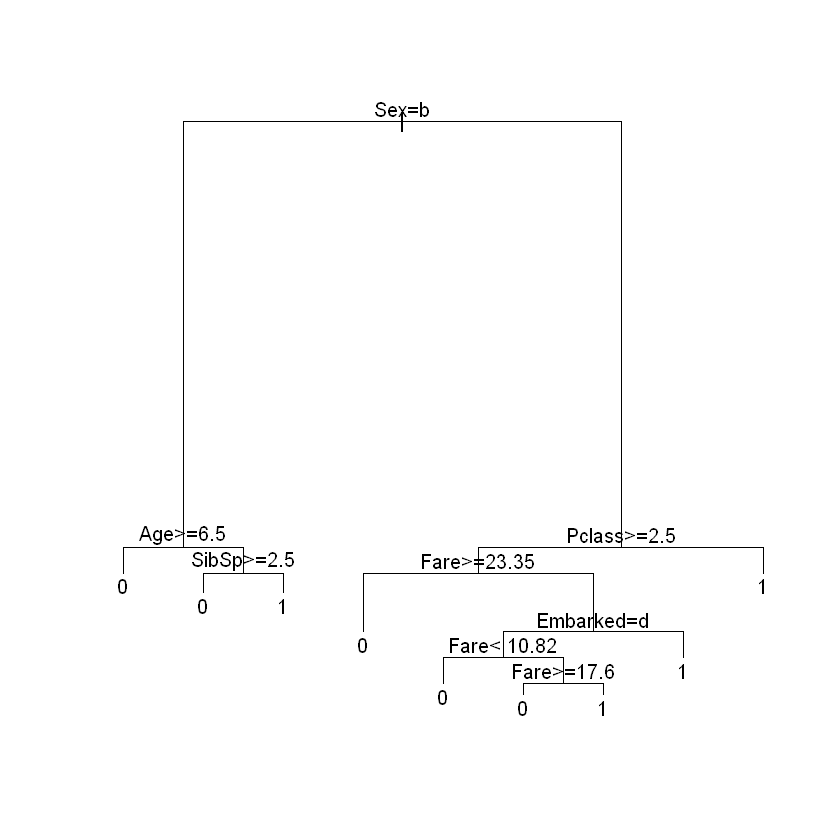

In [17]:
# Visualize the decision tree using plot() and text()
plot(my_tree)
text(my_tree)

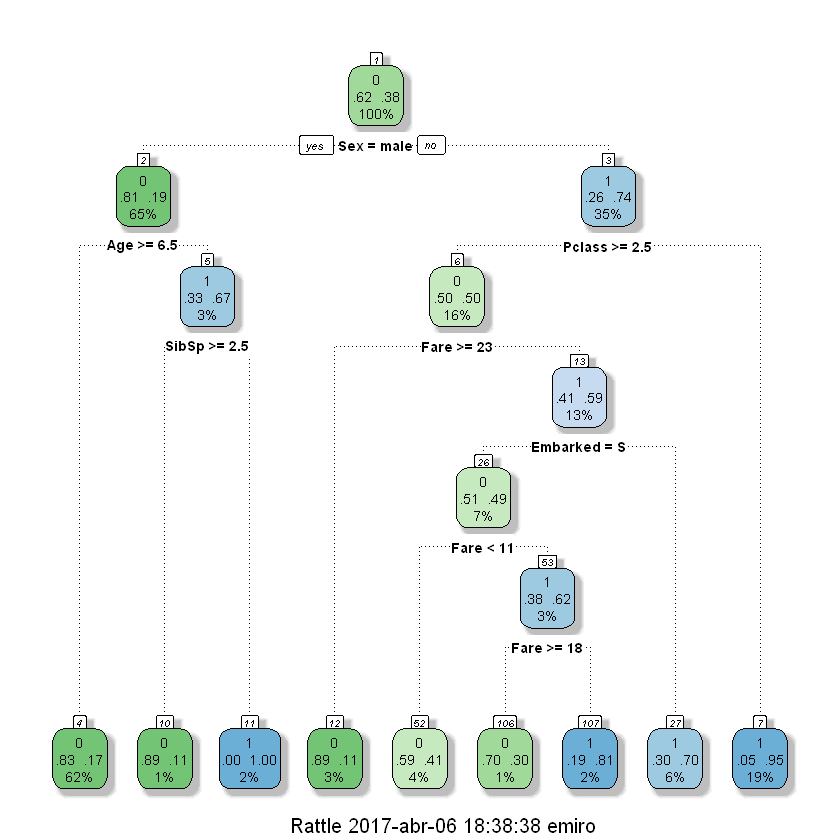

In [18]:
# Plot fancy tree
fancyRpartPlot(my_tree)

Prediction
---

In [19]:
# Make predictions on the test set
my_prediction <- predict(my_tree, newdata = test, type = "class")

# Finish the data.frame() call
my_solution <- data.frame(PassengerId = test$PassengerId, Survived = my_prediction)

# Use nrow() on my_solution
nrow(my_solution)

# Finish the write.csv() call
write.csv(my_solution, file = "my_solution_tt.csv", row.names = FALSE)

[1] 396

In [20]:
confusionMatrix(my_prediction, test$Survived)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 218  59
         1  32  87
                                          
               Accuracy : 0.7702          
                 95% CI : (0.7256, 0.8107)
    No Information Rate : 0.6313          
    P-Value [Acc > NIR] : 2.109e-09       
                                          
                  Kappa : 0.4866          
 Mcnemar's Test P-Value : 0.00642         
                                          
            Sensitivity : 0.8720          
            Specificity : 0.5959          
         Pos Pred Value : 0.7870          
         Neg Pred Value : 0.7311          
             Prevalence : 0.6313          
         Detection Rate : 0.5505          
   Detection Prevalence : 0.6995          
      Balanced Accuracy : 0.7339          
                                          
       'Positive' Class : 0               
                                          

Overfitting
---

"You got a result that outperforms a solution using purely gender."

In rpart, the amount of detail is defined by two parameters:
- cp determines when the splitting up of the decision tree stops.
- minsplit determines the minimum amount of observations in a leaf of the tree.

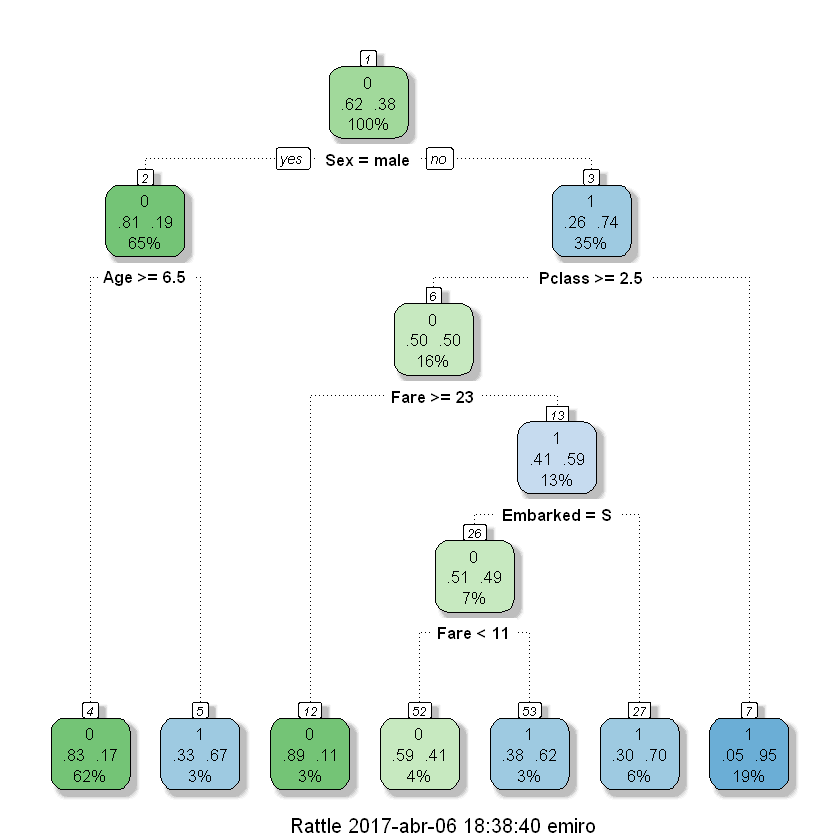

In [21]:
my_tree_2 <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked,
                     data = train, method = "class", control = rpart.control(minsplit = 50, cp = 0))

# Visualize my_tree_three
fancyRpartPlot(my_tree_2)

In [22]:
# Make predictions on the test set
my_prediction_2 <- predict(my_tree_2, newdata = test, type = "class")

# Finish the data.frame() call
my_solution_2 <- data.frame(PassengerId = test$PassengerId, Survived = my_prediction_2)

# Use nrow() on my_solution
nrow(my_solution_2)

# Finish the write.csv() call
write.csv(my_solution_2, file = "my_solution_2.csv", row.names = FALSE)

[1] 396

In [23]:
confusionMatrix(my_prediction_2, test$Survived)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 215  57
         1  35  89
                                          
               Accuracy : 0.7677          
                 95% CI : (0.7229, 0.8084)
    No Information Rate : 0.6313          
    P-Value [Acc > NIR] : 4.143e-09       
                                          
                  Kappa : 0.4848          
 Mcnemar's Test P-Value : 0.02857         
                                          
            Sensitivity : 0.8600          
            Specificity : 0.6096          
         Pos Pred Value : 0.7904          
         Neg Pred Value : 0.7177          
             Prevalence : 0.6313          
         Detection Rate : 0.5429          
   Detection Prevalence : 0.6869          
      Balanced Accuracy : 0.7348          
                                          
       'Positive' Class : 0               
                                          

Feature Engineering
--

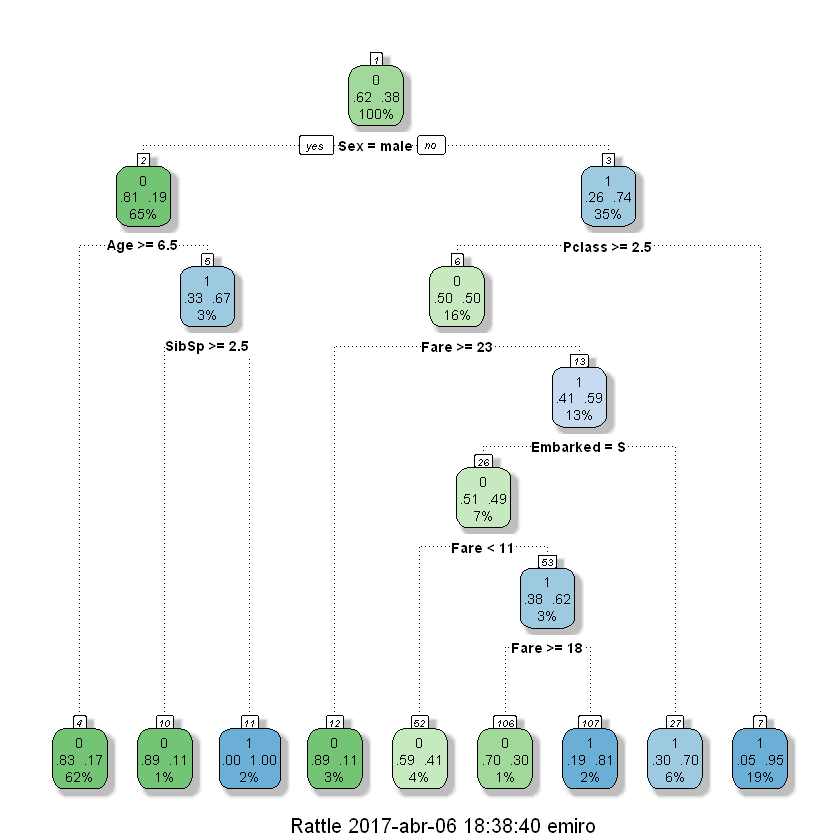

In [24]:
full$Family_size <- full$SibSp + full$Parch + 1

train <- full[1:891,]
test <- full[892:1287,]

# Finish the command
my_tree_3 <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + Family_size,
                      data = train, method = "class")

# Visualize your new decision tree
fancyRpartPlot(my_tree_3)

In [25]:
# Grab title from passenger names
full$Title <- gsub('(.*, )|(\\..*)', '', full$Name)

# Show title counts by sex
table(full$Sex, full$Title)

        
         Capt Col Don Dona  Dr Jonkheer Lady Major Master Miss Mlle Mme  Mr Mrs
  female    0   0   0    1   1        0    1     0      0  254    2   1   0 189
  male      1   4   1    0   7        1    0     2     60    0    0   0 750   0
        
          Ms Rev Sir the Countess
  female   2   0   0            1
  male     0   8   1            0

In [26]:
# Titles with very low cell counts to be combined to "rare" level
rare_title <- c('Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 
                'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer')

# Reassign mlle, ms, and mme accordingly
full$Title[full$Title == 'Mlle']        <- 'Miss' 
full$Title[full$Title == 'Ms']          <- 'Miss'
full$Title[full$Title == 'Mme']         <- 'Mrs' 
full$Title[full$Title %in% rare_title]  <- 'Rare Title'

# Show title counts by sex again
table(full$Sex, full$Title)

        
         Master Miss  Mr Mrs Rare Title
  female      0  258   0 190          4
  male       60    0 750   0         25

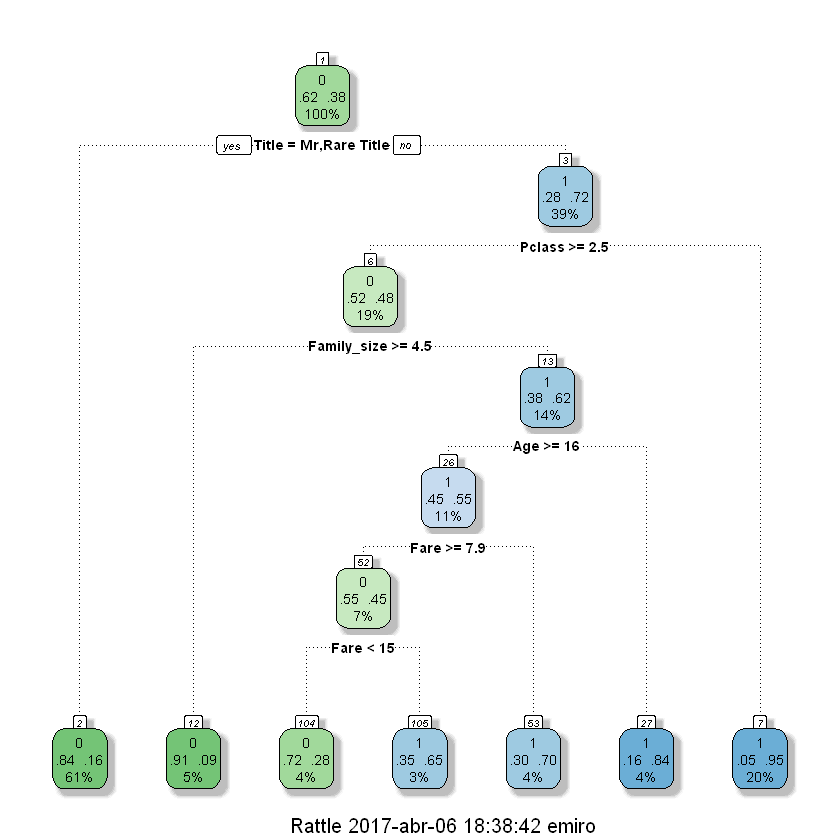

In [27]:
train <- full[1:891,]
test <- full[892:1287,]

my_tree_4 <- rpart(Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + Title + Family_size + Child, 
                   data = train, method = "class")

# Visualize my_tree_4
fancyRpartPlot(my_tree_4)

# Make prediction
my_prediction_3 <- predict(my_tree_4, test, type = "class")

# Make results ready for submission
my_solution_3 <- data.frame(PassengerId = test$PassengerId, Survived = my_prediction_3)
write.csv(my_solution_3, file = "my_solution_3.csv", row.names = FALSE)

In [28]:
confusionMatrix(my_prediction_3, test$Survived)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 214  52
         1  36  94
                                          
               Accuracy : 0.7778          
                 95% CI : (0.7336, 0.8178)
    No Information Rate : 0.6313          
    P-Value [Acc > NIR] : 2.561e-10       
                                          
                  Kappa : 0.5115          
 Mcnemar's Test P-Value : 0.1098          
                                          
            Sensitivity : 0.8560          
            Specificity : 0.6438          
         Pos Pred Value : 0.8045          
         Neg Pred Value : 0.7231          
             Prevalence : 0.6313          
         Detection Rate : 0.5404          
   Detection Prevalence : 0.6717          
      Balanced Accuracy : 0.7499          
                                          
       'Positive' Class : 0               
                                          

Random Forest
--

"In layman's terms, the Random Forest technique handles the overfitting problem you faced with decision trees. It grows multiple (very deep) classification trees using the training set. At the time of prediction, each tree is used to come up with a prediction and every outcome is counted as a vote. For example, if you have trained 3 trees with 2 saying a passenger in the test set will survive and 1 says he will not, the passenger will be classified as a survivor. This approach of overtraining trees, but having the majority's vote count as the actual classification decision, avoids overfitting.

Before starting with the actual analysis, you first need to meet one big condition of Random Forests: no missing values in your data frame."

In [29]:
library('randomForest')

#train_new <- train_new[complete.cases(train_new),]
#test_new <- test_new[complete.cases(test_new),]

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin



In [30]:
indx <- apply(full, 2, function(x) any(is.na(x) | is.infinite(x) | is.nan(x)))
indx

PassengerId    Survived      Pclass        Name         Sex         Age 
      FALSE       FALSE       FALSE       FALSE       FALSE        TRUE 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE       FALSE        TRUE       FALSE       FALSE 
      Child Family_size       Title 
       TRUE       FALSE       FALSE

In [31]:
which(is.na(full$Age), arr.ind=TRUE)

[1]    6   18   20   27   29   30   32   33   37   43   46   47   48   49   56
 [16]   65   66   77   78   83   88   96  102  108  110  122  127  129  141  155
 [31]  159  160  167  169  177  181  182  186  187  197  199  202  215  224  230
 [46]  236  241  242  251  257  261  265  271  275  278  285  296  299  301  302
 [61]  304  305  307  325  331  335  336  348  352  355  359  360  365  368  369
 [76]  376  385  389  410  411  412  414  416  421  426  429  432  445  452  455
 [91]  458  460  465  467  469  471  476  482  486  491  496  498  503  508  512
[106]  518  523  525  528  532  534  539  548  553  558  561  564  565  569  574
[121]  579  585  590  594  597  599  602  603  612  613  614  630  634  640  644
[136]  649  651  654  657  668  670  675  681  693  698  710  712  719  728  733
[151]  739  740  741  761  767  769  774  777  779  784  791  793  794  816  826
[166]  827  829  833  838  840  847  850  860  864  869  879  889  902  913  920
[181]  925  928  930  936  941  945  952  963  970  971  972  975  978  980  989
[196]  993  996 1001 1006 1009 1012 1017 1018 1030 1032 1035 1044 1047 1052 1054
[211] 1057 1067 1072 1075 1083 1084 1089 1095 1100 1103 1110 1116 1126 1136 1137
[226] 1145 1146 1147 1148 1151 1153 1154 1162 1166 1168 1169 1170 1171 1176 1180
[241] 1190 1209 1215 1218 1220 1232 1233 1240 1241 1253 1255 1280 1283 1286 1287

In [32]:
train <- full[1:891,]
test <- full[892:1287,]

In [33]:
predicted_age <- rpart(Age ~ Pclass + Sex + SibSp + Parch + Fare + Embarked + Title + Family_size + Child,
                       data = full[!is.na(full$Age),], method = "anova")
full$Age[is.na(full$Age)] <- predict(predicted_age, full[is.na(full$Age),])

In [34]:
train <- full[1:891,]
test <- full[892:1287,]

In [35]:
which(is.na(train$Embarked), arr.ind=TRUE)

integer(0)

In [36]:
#train_new$Embarked[c(62, 830)] <- "C"

In [37]:
which(is.na(full$Fare), arr.ind=TRUE)

[1] 1036

In [38]:
full$Fare[1036] <- median(full$Fare, na.rm = TRUE)

In [39]:
full$Embarked <- as.factor(full$Embarked)

full$Sex <- as.factor(full$Sex)

full$Title <- as.factor(full$Title)


In [40]:
train <- full[1:891,]
test <- full[892:1287,]

In [41]:
# Apply the Random Forest Algorithm
my_forest <- randomForest(as.factor(Survived) ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked + Title + Family_size, 
                          data = train, importance=TRUE, ntree=2000)

# Make your prediction using the test set
my_prediction_4 <- predict(my_forest, test)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
my_solution_4 <- data.frame(PassengerId = test$PassengerId, Survived = my_prediction_4)

# Write your solution away to a csv file with the name my_solution.csv
write.csv(my_solution_4, file = "my_solution_4.csv", row.names = FALSE)

In [42]:
confusionMatrix(my_prediction_4, test$Survived)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 207  50
         1  43  96
                                         
               Accuracy : 0.7652         
                 95% CI : (0.7202, 0.806)
    No Information Rate : 0.6313         
    P-Value [Acc > NIR] : 8.024e-09      
                                         
                  Kappa : 0.4904         
 Mcnemar's Test P-Value : 0.5338         
                                         
            Sensitivity : 0.8280         
            Specificity : 0.6575         
         Pos Pred Value : 0.8054         
         Neg Pred Value : 0.6906         
             Prevalence : 0.6313         
         Detection Rate : 0.5227         
   Detection Prevalence : 0.6490         
      Balanced Accuracy : 0.7428         
                                         
       'Positive' Class : 0              
                                         

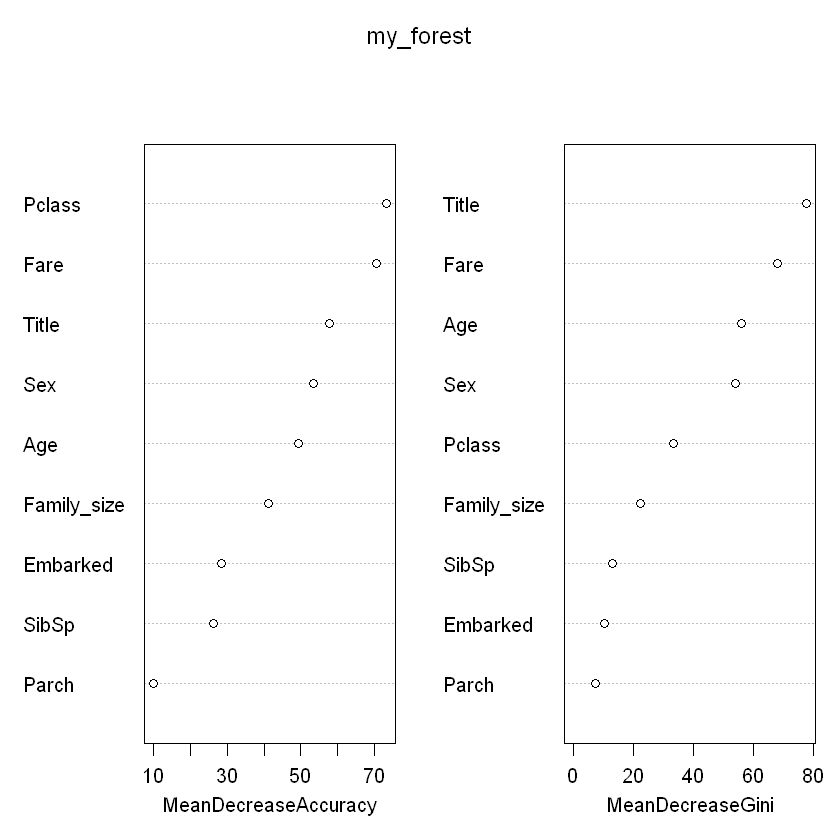

In [43]:
varImpPlot(my_forest)

In [44]:
replace(full$Cabin, full$Cabin == "", NA)
which(is.na(full$Cabin), arr.ind=TRUE)

[1] NA                "C85"             NA                "C123"           
   [5] NA                NA                "E46"             NA               
   [9] NA                NA                "G6"              "C103"           
  [13] NA                NA                NA                NA               
  [17] NA                NA                NA                NA               
  [21] NA                "D56"             NA                "A6"             
  [25] NA                NA                NA                "C23 C25 C27"    
  [29] NA                NA                NA                "B78"            
  [33] NA                NA                NA                NA               
  [37] NA                NA                NA                NA               
  [41] NA                NA                NA                NA               
  [45] NA                NA                NA                NA               
  [49] NA                NA                NA                NA               
  [53] "D33"             NA                "B30"             "C52"            
  [57] NA                NA                NA                NA               
  [61] NA                "B28"             "C83"             NA               
  [65] NA                NA                "F33"             NA               
  [69] NA                NA                NA                NA               
  [73] NA                NA                NA                "F G73"          
  [77] NA                NA                NA                NA               
  [81] NA                NA                NA                NA               
  [85] NA                NA                NA                NA               
  [89] "C23 C25 C27"     NA                NA                NA               
  [93] "E31"             NA                NA                NA               
  [97] "A5"              "D10 D12"         NA                NA               
 [101] NA                NA                "D26"             NA               
 [105] NA                NA                NA                NA               
 [109] NA                NA                "C110"            NA               
 [113] NA                NA                NA                NA               
 [117] NA                NA                "B58 B60"         NA               
 [121] NA                NA                NA                "E101"           
 [125] "D26"             NA                NA                NA               
 [129] "F E69"           NA                NA                NA               
 [133] NA                NA                NA                NA               
 [137] "D47"             "C123"            NA                "B86"            
 [141] NA                NA                NA                NA               
 [145] NA                NA                NA                NA               
 [149] "F2"              NA                NA                "C2"             
 [153] NA                NA                NA                NA               
 [157] NA                NA                NA                NA               
 [161] NA                NA                NA                NA               
 [165] NA                NA                "E33"             NA               
 [169] NA                NA                "B19"             NA               
 [173] NA                NA                "A7"              NA               
 [177] NA                "C49"             NA                NA               
 [181] NA                NA                NA                "F4"             
 [185] NA                "A32"             NA                NA               
 [189] NA                NA                NA                NA               
 [193] NA                "F2"              "B4"              "B80"            
 [197] NA                NA                NA                NA               
 [201] NA                NA                NA        

integer(0)

In [45]:
full$Deck<-factor(sapply(full$Cabin, function(x) strsplit(x, NA)[[1]][1]))

In [46]:
full$Has_Cabin <- 1
full$Has_Cabin[full$Deck == ""] <- 0
full$Has_Cabin <- as.factor(full$Has_Cabin)


In [47]:
full$Has_Cabin

[1] 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0
  [75] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1
 [112] 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 [149] 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 [186] 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 [223] 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0
 [260] 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 [297] 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1
 [334] 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 [371] 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 [445] 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 [482] 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0
 [519] 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 [556] 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1
 [593] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 [630] 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 [667] 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0
 [704] 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 [741] 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1
 [778] 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0
 [815] 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 [852] 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 [889] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0
 [926] 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1
 [963] 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1
[1000] 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0
[1037] 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0
[1074] 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
[1111] 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1
[1185] 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0
[1222] 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0
[1259] 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0
Levels: 0 1

In [48]:
full$Is_Alone[full$Family_size==1] <- 1
full$Is_Alone[full$Family_size>1] <- 0
full$Is_Alone <- as.factor(full$Is_Alone)

In [49]:
train <- full[1:891,]
test <- full[892:1287,]

In [50]:
# Apply the Random Forest Algorithm
my_forest_2 <- randomForest(as.factor(Survived) ~ Pclass + Sex + Age + Family_size,
                          data = train, importance=TRUE, ntree=2000)

# Make your prediction using the test set
my_prediction_5 <- predict(my_forest_2, test)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
my_solution_5 <- data.frame(PassengerId = test$PassengerId, Survived = my_prediction_5)

# Write your solution away to a csv file with the name my_solution.csv
write.csv(my_solution_5, file = "my_solution_5.csv", row.names = FALSE)

In [51]:
confusionMatrix(my_prediction_5, test$Survived)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 208  47
         1  42  99
                                          
               Accuracy : 0.7753          
                 95% CI : (0.7309, 0.8154)
    No Information Rate : 0.6313          
    P-Value [Acc > NIR] : 5.245e-10       
                                          
                  Kappa : 0.5137          
 Mcnemar's Test P-Value : 0.6716          
                                          
            Sensitivity : 0.8320          
            Specificity : 0.6781          
         Pos Pred Value : 0.8157          
         Neg Pred Value : 0.7021          
             Prevalence : 0.6313          
         Detection Rate : 0.5253          
   Detection Prevalence : 0.6439          
      Balanced Accuracy : 0.7550          
                                          
       'Positive' Class : 0               
                                          

In [52]:
full$Length_Ticket <- nchar(as.character(full$Ticket))

In [53]:
full$Length_Ticket <- as.factor(full$Length_Ticket)

In [62]:
full$Child <- as.factor(full$Child)

In [68]:
full$Child[full$Age<18] <- 1
full$Child[full$Age>=18] <- 0

In [69]:
train <- full[1:891,]
test <- full[892:1287,]

In [83]:
full$Mother <- 'Not Mother'
full$Mother[full$Sex == 'female' & full$Parch > 0 & full$Age > 18 & full$Title != 'Miss'] <- 'Mother'
full$Mother <- as.factor(full$Mother)

In [85]:
train <- full[1:891,]
test <- full[892:1287,]

In [109]:
# Apply the Random Forest Algorithm
my_forest_3 <- randomForest(as.factor(Survived) ~ Pclass + Sex + Age + Mother + SibSp + Parch + 
                                            Embarked + Title + 
                                            Family_size + Is_Alone + Child +
                                            Length_Ticket,
                                            data = train, importance=TRUE, ntree=2000)

# Make your prediction using the test set
my_prediction_6 <- predict(my_forest_3, test)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
my_solution_6 <- data.frame(PassengerId = test$PassengerId, Survived = my_prediction_6)

# Write your solution away to a csv file with the name my_solution.csv
write.csv(my_solution_6, file = "my_solution_6.csv", row.names = FALSE)

In [110]:
confusionMatrix(test$Survived, my_prediction_6)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 204  46
         1  45 101
                                          
               Accuracy : 0.7702          
                 95% CI : (0.7256, 0.8107)
    No Information Rate : 0.6288          
    P-Value [Acc > NIR] : 1.144e-09       
                                          
                  Kappa : 0.5071          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8193          
            Specificity : 0.6871          
         Pos Pred Value : 0.8160          
         Neg Pred Value : 0.6918          
             Prevalence : 0.6288          
         Detection Rate : 0.5152          
   Detection Prevalence : 0.6313          
      Balanced Accuracy : 0.7532          
                                          
       'Positive' Class : 0               
                                          

In [101]:
my_new_tree <- rpart(Survived ~ Pclass + Sex + Age + Mother + SibSp + Parch + 
                                            Embarked + Title + 
                                            Family_size + Is_Alone + Child +
                                            Length_Ticket,
                                             data = train, method = "class")

In [111]:
train <- full[1:891,]
test <- full[892:1287,]

my_new_tree <- rpart(Survived ~ Pclass + Sex + Age + Mother + SibSp + Parch + 
                                            Embarked + Title + 
                                            Family_size + Is_Alone + Child +
                                            Length_Ticket, 
                   data = train, method = "class")

# Make prediction
my_new_prediction <- predict(my_new_tree, test, type = "class")

# Make results ready for submission
my_new_solution <- data.frame(PassengerId = test$PassengerId, Survived = my_new_prediction)
write.csv(my_new_solution, file = "my_new_solution.csv", row.names = FALSE)

In [112]:
confusionMatrix(test$Survived, my_new_prediction)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 205  45
         1  44 102
                                          
               Accuracy : 0.7753          
                 95% CI : (0.7309, 0.8154)
    No Information Rate : 0.6288          
    P-Value [Acc > NIR] : 2.785e-10       
                                          
                  Kappa : 0.5179          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8233          
            Specificity : 0.6939          
         Pos Pred Value : 0.8200          
         Neg Pred Value : 0.6986          
             Prevalence : 0.6288          
         Detection Rate : 0.5177          
   Detection Prevalence : 0.6313          
      Balanced Accuracy : 0.7586          
                                          
       'Positive' Class : 0               
                                          